In [2]:
    from __future__ import print_function
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
#XRD Ensemble
#28 4NPQ
#21 4HFI
%matplotlib inline

In [3]:
"""

system no.
0. 5NJY_pH70
1. 5NJY_F238L_pH70
2. 5NJY_I233T_pH70
3. 5NJY_F238LI233T_pH70
4. 5NJY_pH46
5. 5NJY_F238L_pH46
6. 5NJY_I233T_pH46
7. 5NJY_F238LI233T_pH46
8. 4HFI_pH46
9. 4HFI_F238L_pH46
10. 4HFI_I233T_pH46
11. 4HFI_F238LI233T_pH46
12. 4NPQ_pH70
13. 4NPQ_F238L_pH70
14. 4NPQ_I233T_pH70
15. 4NPQ_F238LI233T_pH70
16. 4HFI_pH70
17. 4NPQ_F238LI233T_pH46
18. 4NPQ_F238L_pH46
19. 4NPQ_pH46
20. 4NPQ_I233T_pH46

"""

'\n\nsystem no.\n0. 5NJY_pH70\n1. 5NJY_F238L_pH70\n2. 5NJY_I233T_pH70\n3. 5NJY_F238LI233T_pH70\n4. 5NJY_pH46\n5. 5NJY_F238L_pH46\n6. 5NJY_I233T_pH46\n7. 5NJY_F238LI233T_pH46\n8. 4HFI_pH46\n9. 4HFI_F238L_pH46\n10. 4HFI_I233T_pH46\n11. 4HFI_F238LI233T_pH46\n12. 4NPQ_pH70\n13. 4NPQ_F238L_pH70\n14. 4NPQ_I233T_pH70\n15. 4NPQ_F238LI233T_pH70\n16. 4HFI_pH70\n17. 4NPQ_F238LI233T_pH46\n18. 4NPQ_F238L_pH46\n19. 4NPQ_pH46\n20. 4NPQ_I233T_pH46\n\n'

In [4]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md1',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3',
              '5NJY_F238L_pH46_md1','5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1',
              '4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5',
              '4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5','4HFI_pH70_md1',
              '4NPQ_F238LI233T_pH46_md1','4NPQ_F238L_pH46_md1',
              '4NPQ_F238L_pH46_md2','4NPQ_pH46_md1','4NPQ_I233T_pH46_md1','4NPQ_I233T_pH46_md2','4NPQ_I233T_pH46_md3']

In [5]:
md_data = pd.read_csv("glic_gating.csv")
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'Hbond_235_259', 'Hbond_200_239', 'Hbond_200_243',
       'hydration_data_m123', 'hbond_water_200_239', 'hbond_water_200_243',
       'water_bridge_200_243', 'water_bridge_200_239', 'hbond(235, 259)',
       'hbond(239, 200)', 'hbond(243, 200)', 'hbond_200_239', 'hbond_200_243',
       'hydration_data_intra', 'hydration_data_inter', 'hbond_235_239',
       'hbond_235

In [19]:
#Normalization
md_data_feature = md_data[['wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink','Hbond_235_259']]
md_data_feature = (md_data_feature - md_data_feature.min()) / (md_data_feature.max() - md_data_feature.min())
md_norm = md_data
md_norm[md_data_feature.columns] = md_data_feature
md_data = pd.read_csv("glic_gating.csv")

In [8]:
md_5NJY_pH70 = md_data[(md_data.system == 0) | (md_data.system == 1) | (md_data.system == 2) | (md_data.system == 3)]
md_5NJY_pH46 = md_data[(md_data.system == 4) | (md_data.system == 5) | (md_data.system == 6) | (md_data.system == 7)]
md_4HFI_pH46 = md_data[(md_data.system == 8) | (md_data.system == 9) | (md_data.system == 10) | (md_data.system == 11)]
md_4NPQ_pH70 = md_data[(md_data.system == 12) | (md_data.system == 13) | (md_data.system == 14) | (md_data.system == 15)]

In [9]:
md_WT = md_data[~md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('I233T')]
md_F238L = md_data[md_data.MD_name.str.contains('F238L') & ~md_data.MD_name.str.contains('F238LI233T')]
md_I233T = md_data[md_data.MD_name.str.contains('I233T') & ~md_data.MD_name.str.contains('F238LI233T')]
md_F238LI233T = md_data[md_data.MD_name.str.contains('F238LI233T')]

In [10]:
md_data_10 = md_data[(md_data.traj_time >= 10)]
md_data_10 = md_data.reset_index()

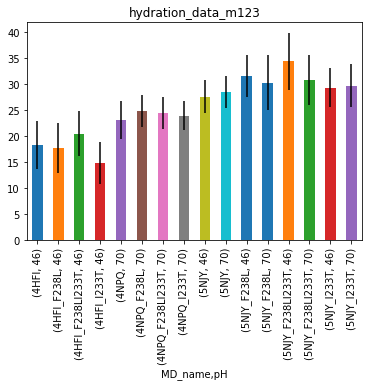

In [6]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hydration_data_m123']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('hydration_data_m123')

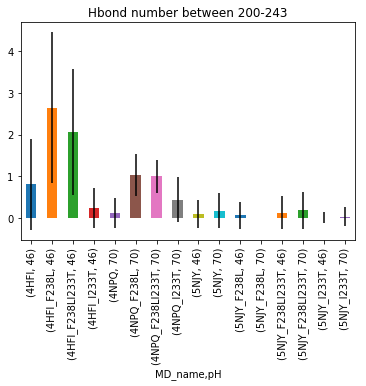

In [12]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_200_243']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Hbond number between 200-243')
plt.savefig('fig2.png', bbox_inches='tight')

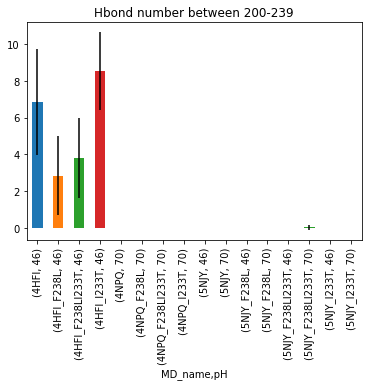

In [191]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Hbond number between 200-239')

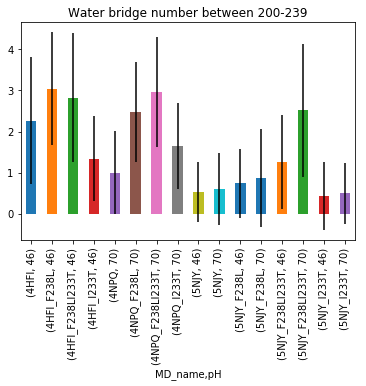

In [13]:
group = md_data[(md_data['system'] >=0) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_water_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Water bridge number between 200-239')
plt.savefig('fig1.png', bbox_inches='tight')

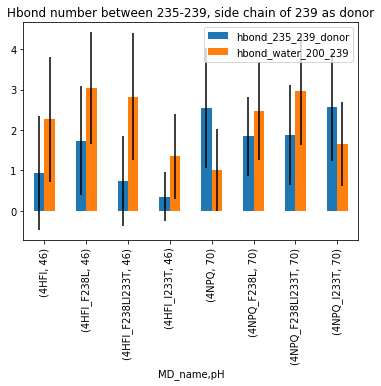

In [199]:
group = md_data[(md_data['system'] >=8) & (md_data['system'] <= 15)].groupby(['MD_name','pH'])['hbond_235_239_donor','hbond_water_200_239']
mean = group.mean()
errors = group.std()
ax = plt.subplot()
mean.plot.bar(yerr=errors,ax=ax)
plt.title('Hbond number between 235-239, side chain of 239 as donor')

In [178]:
md_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'MD_name', 'pH', 'replicate', 'traj_time',
       'system', 'rmsd', 'wholepca_pc1', 'wholepca_pc2', 'ecd_pc1', 'tmd_pc1',
       'domain twist', 'ecd_pc2', 'tmd_pc2', 'hydration_data',
       'hydration_data_235_3a', 'hydration_data_233_3a',
       'hydration_data_238_3a', 'hydration_data_226_3a',
       'hydration_data_240_3a', 'pore_profile_222', 'pore_profile_226',
       'pore_profile_230', 'pore_profile_233', 'pore_profile_237',
       'pore_profile_240', 'helix tilt angle', 'helix twist angle',
       'beta_expansion', 'M2_radius', 'ECD_radius', 'M2_M1_distance',
       'M1_kink', 'Hbond_235_259', 'Hbond_200_239', 'Hbond_200_243',
       'hydration_data_m123', 'hbond_water_200_239', 'hbond_water_200_243',
       'water_bridge_200_243', 'water_bridge_200_239', 'hbond(235, 259)',
       'hbond(239, 200)', 'hbond(243, 200)', 'hbond_200_239', 'hbond_200_243',
       'hydration_data_intra', 'hydration_data_inter', 'hbond_235_239'],
      dtype='obj